In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [119]:
import warnings
warnings.filterwarnings('ignore')

### Data Cleaning and Formatting

In [2]:
#Read in data into a dataframe
data = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

#Display the top rows of dataframe
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [5]:
#Check the Number of Columns also known as Features
data.shape

(11746, 60)

In [6]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

### Convert Data to Correct Types
We convert the columns with numbers into numeric data types by replacing the "Not Available" entries with np.nan which can be interpreted as floats. Then we will convert the columns that contain numeric values (such as square feet or energy usage) into numeric datatypes.

In [10]:
# Replace all occurences of Not available with numpy not a number
data = data.replace({'Not Available' : np.nan})
#data.head()

In [11]:
# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [13]:
#data.info()

In [14]:
#Statistics for each column
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

In [20]:
data.isnull().sum()

Order                                                             0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  11
NYC Borough, Block and Lot (BBL) self-reported                   11
NYC Building Identification Number (BIN)                        162
Address 1 (self-reported)                                         0
Address 2                                                     11539
Postal Code                                                       0
Street Number                                                   124
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                            

In [17]:
len(data)

11746

In [53]:
#Function to calculate the missing Values by columns
def missing_values_table(df):
    
    #Total Missing Values
    mis_val = df.isnull().sum()
    
    #Percentage of Missing Values
    mis_val_percent = (100 * mis_val) / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    #Renaming the Column Names
    mis_val_table = mis_val_table.rename(columns={0:'Missing Values', 1:'% of Total Values'})
    
    #Remove the rows with 0 missing values and Sort it Descending
    mis_val_table = mis_val_table[mis_val_table.iloc[:,0] != 0].sort_values('% of Total Values',
                                                                            ascending = False).round(2)
    
    #Print some Information
    print('Given Dataframe has ' + str(df.shape[1]) + ' columns. \nThere are ' + str(mis_val_table.shape[0]) + 
            ' Columns that have missing Values.' )
    
    return mis_val_table


In [54]:
missing_values_table(data)

Given Dataframe has 60 columns. 
There are 46 Columns that have missing Values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.92
Diesel #2 Use (kBtu),11730,99.86
Address 2,11539,98.24
Fuel Oil #5 & 6 Use (kBtu),11152,94.94
District Steam Use (kBtu),10810,92.03
Fuel Oil #4 Use (kBtu),10425,88.75
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.37
3rd Largest Property Use Type,10262,87.37
Fuel Oil #2 Use (kBtu),9165,78.03
2nd Largest Property Use Type,8005,68.15


we will remove any columns with more than 50% missing values. In general, be careful about dropping any information because even if it is not there for all the observations, it may still be useful for predicting the target value.

In [57]:
miss_df = missing_values_table(data)
removable_columns = list(miss_df[miss_df['% of Total Values'] > 50].index)
print('We will remove ' + str(len(removable_columns)) + ' columns')

Given Dataframe has 60 columns. 
There are 46 Columns that have missing Values.
We will remove 11 columns


In [58]:
data = data.drop(columns=list(removable_columns), axis=1)

In [62]:
#data.head()
#data.shape

The rest of the missing values will be imputed (filled-in) using an appropriate strategy before doing machine learning.



### Exploratory Data Analysis¶


The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine.

To begin the EDA, we will focus on a single variable, the Energy Star Score, because this is the target for our machine learning models. We can rename the column to score for simplicity and then start exploring this value.

In [63]:
data = data.rename(columns={'ENERGY STAR Score' : 'score'})

#### Single Variable Plots
A single variable (called univariate) plot shows the distribution of a single variable such as in a histogram.

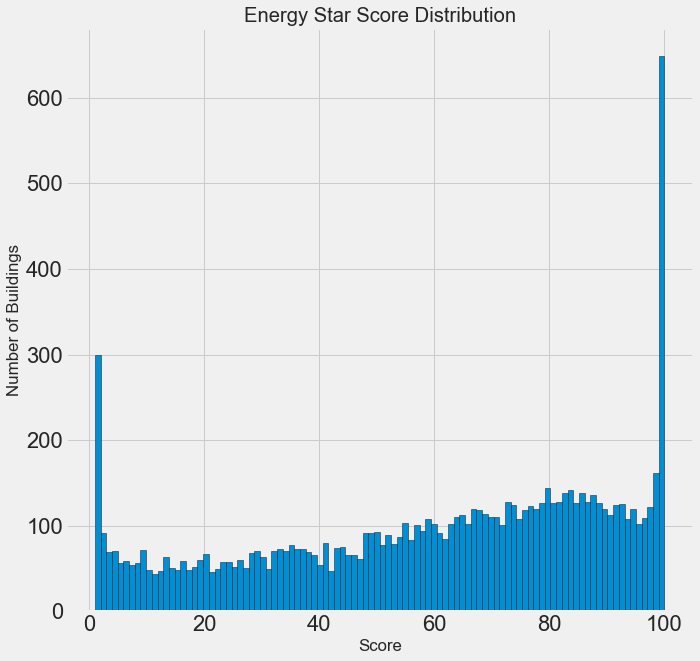

In [72]:
figsize(10, 10)
#Histogram for Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

Our first plot has already revealed some surprising (and suspicious) information! As the Energy Star Score is a percentile rank, we would expect to see a completely flat distribution with each score making up 1% of the distribution (about 90 buildings). However, this is definitely not the case as we can see that the two most common scores, 1 and 100, make up a disproporationate number of the overall scores.

If we go back to the definition of the score, we see it is based on self-reported energy usage. This poses a problem, because a building owner might be tempted to report lower electricity usage to artificially boost the score of their building. It is like giving students a grade based on self-reported test scores. This behavior would explain the high percentage of buildings with a perfect score of 100, but does not explain why so many buildings score at the very bottom!

To contrast the Energy Star Score, we can look at the Energy Use Intensity (EUI), which is the total energy use divided by the square footage of the building. Here the energy usage is not self-reported, so this could be a more objective measure of the energy efficiency of a building. Moreover, this is not a percentile rank, so the absolute values are important and we would expect them to be approximately normally distributed with perhaps a few outliers on the low or high end.

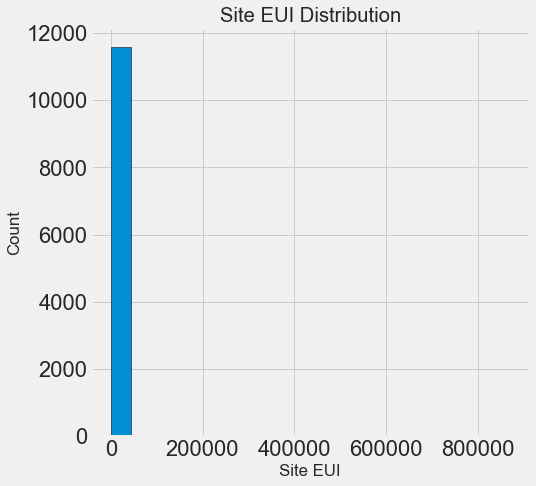

In [75]:
# Histogram Plot of Site EUI
figsize(7, 7)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

Well this shows us we have another problem: outliers! The graph is incredibly skewed because of the presence of a few buildings with very high scores. It looks like we will have to take a slight detour to deal with the outliers. Let's look at the stats for this feature.



In [76]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [79]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [81]:
data.iloc[8068,]

Order                                                                                                      9984
Property Id                                                                                             4414323
Property Name                                                                                      234 Skillman
Parent Property Id                                                          Not Applicable: Standalone Property
Parent Property Name                                                        Not Applicable: Standalone Property
BBL - 10 digits                                                                                      3028937502
NYC Borough, Block and Lot (BBL) self-reported                                                       3028937502
NYC Building Identification Number (BIN)                                                      3390250 , 3338313
Address 1 (self-reported)                                                                   234 Skillman


It might be worthwhile for someone to follow up with this building owner! However, that is not our problem and we only need to figure out how to handle this information. Outliers can occur for many reasons: typos, malfunctions in measuring devices, incorrect units, or they can be legitimate but extreme values. Outliers can throw off a model because they are not indicative of the actual distribution of data.

### Removing Outliers
When we remove outliers, we want to be careful that we are not throwing away measurements just because they look strange. They may be the result of actual phenomenon that we should further investigate. When removing outliers, I try to be as conservative as possible, using the definition of an extreme outlier:

On the low end, an extreme outlier is below 
$$\text{First Quartile} -3 * \text{Interquartile Range}$$
On the high end, an extreme outlier is above 
$$\text{Third Quartile} + 3 * \text{Interquartile Range}$$
In this case, I will only remove the single outlying point and see how the distribution looks.

In [82]:
#Calculating the first and third Quantile 
firstQuantile = data['Site EUI (kBtu/ft²)'].describe()['25%']
thirdQuantile = data['Site EUI (kBtu/ft²)'].describe()['75%']

#Calculating IQR 
iqr = thirdQuantile - firstQuantile

#Conditioning Parameter
cond1 = firstQuantile - 3 * iqr
cond2 = thirdQuantile + 3 * iqr

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > cond1) & (data['Site EUI (kBtu/ft²)'] < cond2)]

In [83]:
data.shape

(11319, 49)

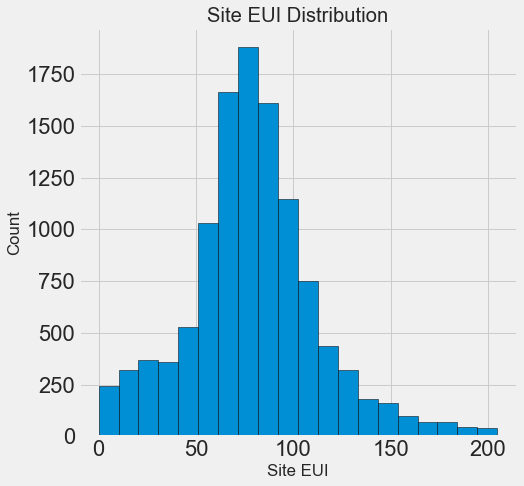

In [84]:
# Histogram Plot of Site EUI
figsize(7, 7)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

After removing the outliers, we can get back to the analysis.

This plot looks a little less suspicious and is close to normally distributed with a long tail on the right side (it has a positive skew).

Although this might be a more objective measure, our goal is still to predict the Energy Star Score, so we will move back to examining that variable. Even if the score is not a good measure, it is still our task to predict it.




### Looking for Relationships
In order to look at the effect of categorical variables on the score, we can make a density plot colored by the value of the categorical variable. Density plots also show the distribution of a single variable and can be thought of as a smoothed histogram. If we color the density curves by a categorical variable, this will shows us how the distribution changes based on the class.

The first plot we will make shows the distribution of scores by the property type. In order to not clutter the plot, we will limit the graph to building types that have more than 100 observations in the dataset.

In [87]:
#Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)
types

['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse']

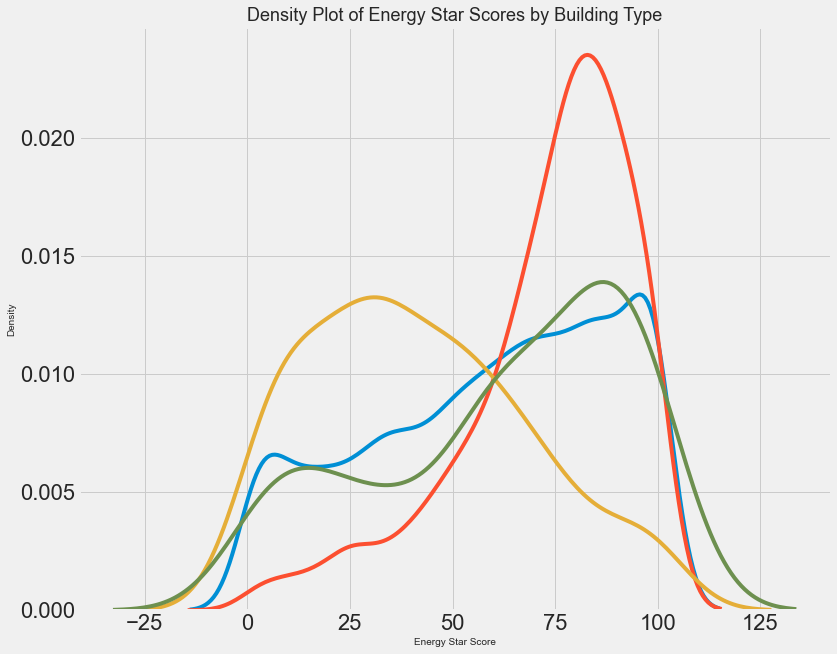

In [98]:
# Plot of distribution of scores for building categories
figsize(12, 10)

#KDE plot for Each type of Building
for b_type in types:
    
    #Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 10); plt.ylabel('Density', size = 10); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 18);

    

From this graph, we can see that the building type does have an effect on the score (the negative scores on the graph are an artifact of the kernel density estimation procedure). While I was initially going to focus on the numerical columns for predicting the score, this graph tells us that we should include the property type because this information can be useful for determining the score. As building type is a categorical variable, it will have to be one-hot encoded before we can feed it into a machine learning model.

To examine another categorical variable, borough, we can make the same graph, but this time colored by the borough.

In [99]:
#Create a list of buildings with more than 100 measurements
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)
boroughs

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

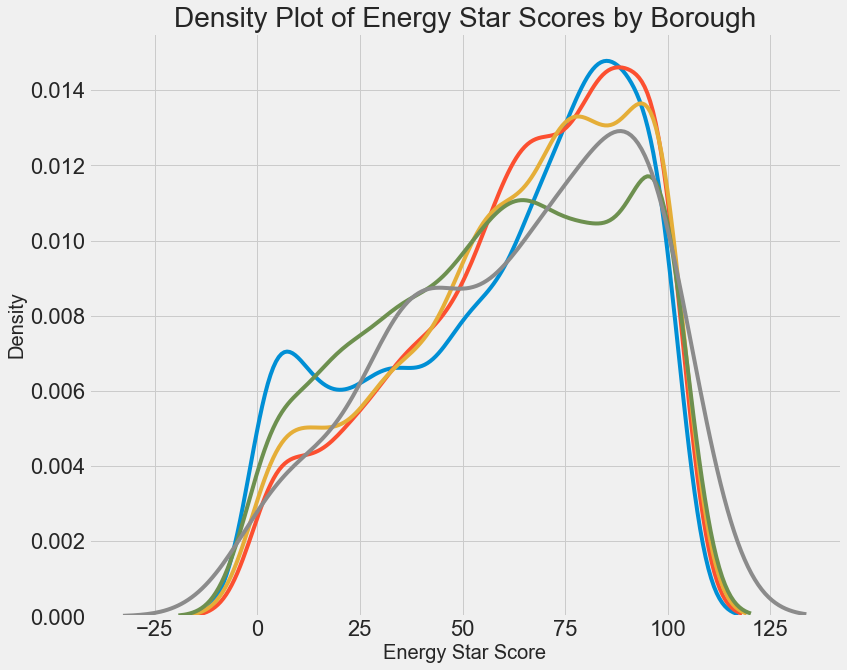

In [101]:
# Plot of distribution of scores for boroughs
#figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

The borough of the building does not seem to make as significant a difference in the distribution of the score as does the building type. Nonetheless, it might make sense to include the borough as a categorical variable.

In order to quantify correlations between the features (variables) and the target, we can calculate the Pearson correlation coefficient. This is a measure of the strength and direction of a linear relationship between two variables: a value of -1 means the two variables are perfectly negatively linearly correlated and a value of +1 means the two variables are perfectly positively linearly correlated.

Although there can be non-linear relationships between the features and targets and correlation coefficients do not account for interactions between features, linear relationships are a good way to start exploring trends in the data. We can then use these values for selecting the features to employ in our model.

The code below calculates the correlation coefficients between all the variables and the score.



In [105]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()
correlations_data

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

There are several strong negative correlations between the features and the target. The most negative correlations with the score are the different categories of Energy Use Intensity (EUI), Site EUI (kBtu/ft²) and Weather Normalized Site EUI (kBtu/ft²) (these vary slightly in how they are calculated). The EUI is the amount of energy used by a building divided by the square footage of the buildings and is meant to be a measure of the efficiency of a building with a lower score being better. Intuitively, these correlations then make sense: as the EUI increases, the Energy Star Score tends to decrease.

To account for possible non-linear relationships, we can take square root and natural log transformations of the features and then calculate the correlation coefficients with the score. To try and capture any possible relationships between the borough or building type (remember these are categorical variables) and the score we will have to one-hot encode these columns.

In the following code, we take log and square root transformations of the numerical variables, one-hot encode the two selected categorical variables (building type and borough), calculate the correlations between all of the features and the score, and display the top 15 most positive and top 15 most negative correlations. This is a lot, but with pandas, it is straightforward to do each step!

In [121]:
# Select the numeric columns
numerical_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numerical_subset.columns:
    #Skip the Score column
    if col == 'score':
        next
    else:
        numerical_subset['sqrt ' + col] = np.sqrt(numerical_subset[col])
        numerical_subset['log ' + col] = np.log(numerical_subset[col])
        
#Select the categorical Columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

#One hot encoding for the categorical feature
categorical_subset = pd.get_dummies(categorical_subset)

#Now join the Numerical and categorical columns to gether as a dataframe, use axis = 1 for column binding
features = pd.concat([numerical_subset,categorical_subset], axis=1)

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()


correlations

Site EUI (kBtu/ft²)                             -0.723864
Weather Normalized Site EUI (kBtu/ft²)          -0.713993
sqrt Site EUI (kBtu/ft²)                        -0.699817
sqrt Weather Normalized Site EUI (kBtu/ft²)     -0.689019
sqrt Weather Normalized Source EUI (kBtu/ft²)   -0.671044
                                                   ...   
sqrt Council District                            0.060623
log Council District                             0.061101
Council District                                 0.061639
Largest Property Use Type_Office                 0.158484
score                                            1.000000
Name: score, Length: 107, dtype: float64

After transforming the features, the strongest relationships are still those related to Energy Use Intensity (EUI). The log and square root transformations do not seem the have resulted in any stronger relationships. There are no strong positive linear relationships although we do see that a building type of office (Largest Property Use Type_Office) is slightly positively correlated with the score. This variable is a one-hot encoded representation of the categorical variables for building type.

We can use these correlations in order to perform feature selection (coming up in a little bit). Right now, let's graph the most significant correlation (in terms of absolute value) in the dataset which is Site EUI (kBtu/ft^2). We can color the graph by the building type to show how that affects the relationship.



### Two-Variable Plots
In order to visualize the relationship between two variables, we use a scatterplot. We can also include additional variables using aspects such as color of the markers or size of the markers. Here we will plot two numeric variables against one another and use color to represent a third categorical variable.



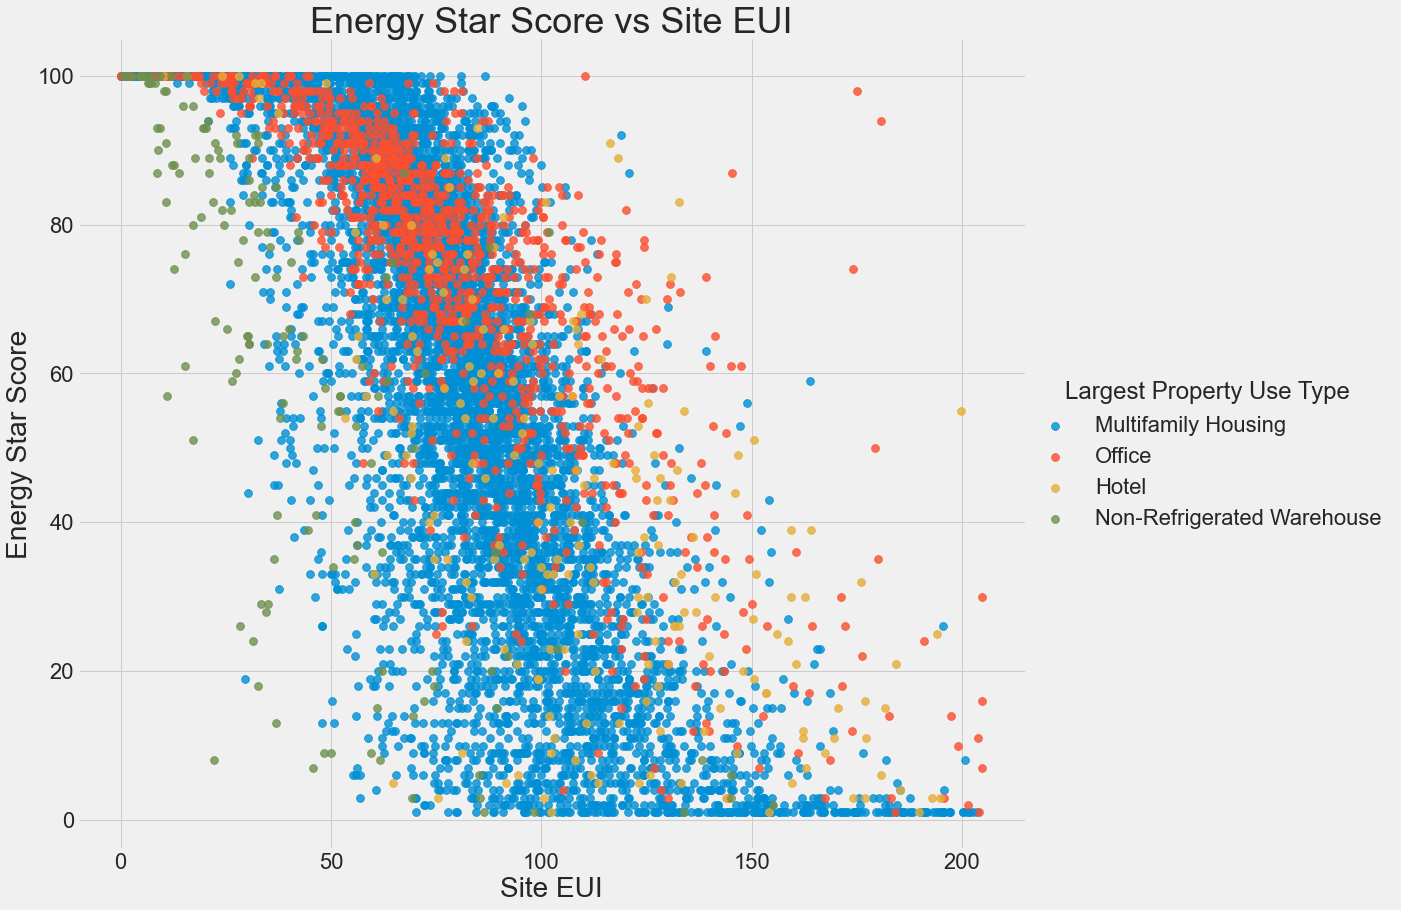

In [120]:
figsize(12, 10)

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

There is a clear negative relationship between the Site EUI and the score. The relationship is not perfectly linear (it looks with a correlation coefficient of -0.7, but it does look like this feature will be important for predicting the score of a building.